In [1]:
# Bibliotecas para poder realizar análises estatísticas e visualizações de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Estadistica inferencial

La estadistica inferencial permite estimar propiedades de una poblacion a partir de una muestra aleatoria de una poblacion.

Continente: América
Altura media estimada: 170.48 cm
Intervalo de confianza del 95%: (169.07, 171.89) cm



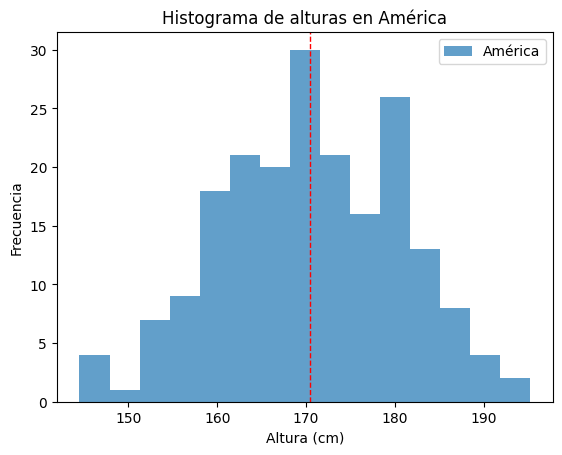

Continente: Europa
Altura media estimada: 170.71 cm
Intervalo de confianza del 95%: (169.28, 172.14) cm



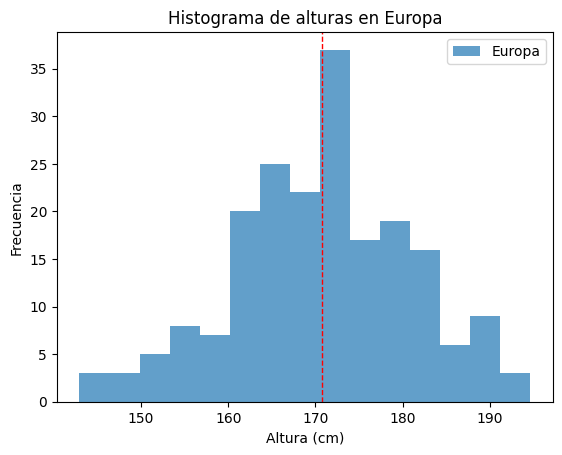

Continente: Asia
Altura media estimada: 169.70 cm
Intervalo de confianza del 95%: (168.31, 171.10) cm



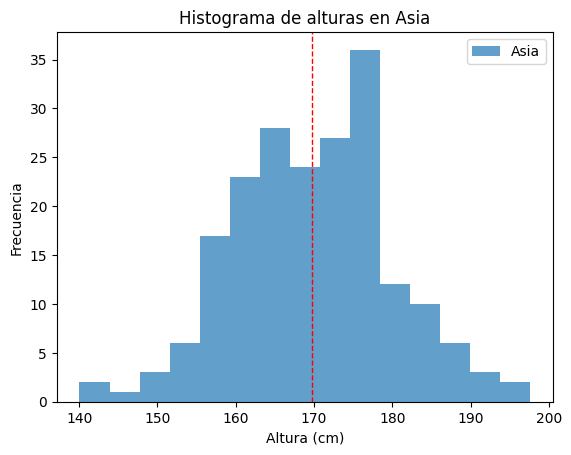

Continente: África
Altura media estimada: 169.72 cm
Intervalo de confianza del 95%: (168.24, 171.21) cm



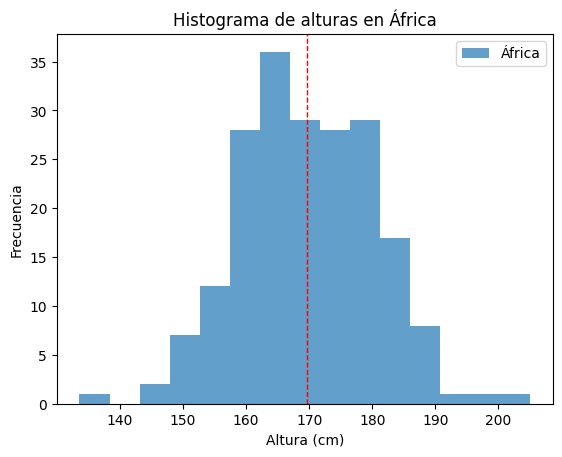

Continente: Oceanía
Altura media estimada: 170.89 cm
Intervalo de confianza del 95%: (169.45, 172.32) cm



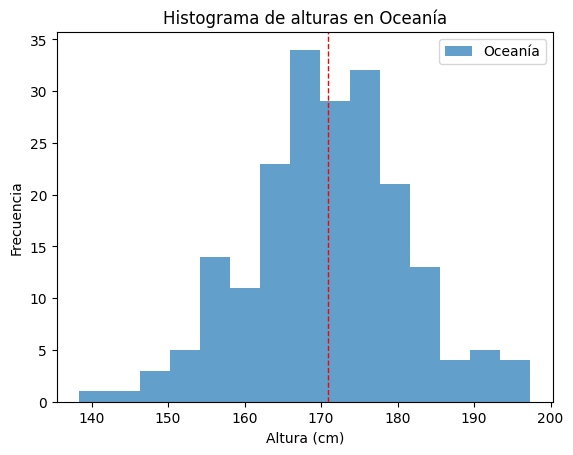

In [ ]:
# Estimar la altura media de hombres de 18-30 años en el mundo 
# tomando muestras de 200 personas por continente

# Configurar semilla para reproducibilidad
np.random.seed(42)

# Continentes y población simulada
continentes = ["América", "Europa", "Asia", "África", "Oceanía"]
poblacion = pd.DataFrame({
    "continente": np.random.choice(continentes, size=10000),
    "edad": np.random.randint(18, 31, size=10000),
    "altura": np.random.normal(loc=170, scale=10, size=10000)
})

# PASO 1: Calcular los PARÁMETROS POBLACIONALES REALES (la "verdad" que queremos estimar)
media_real = poblacion["altura"].mean()
std_real = poblacion["altura"].std()

print("="*70)
print("📊 PARÁMETROS POBLACIONALES (la 'verdad' que intentamos estimar)")
print("="*70)
print(f"Media real de la población: {media_real:.2f} cm")
print(f"Desviación estándar real: {std_real:.2f} cm")
print(f"Tamaño de la población: {len(poblacion):,} personas")
print("\n⚠️  En la vida real, NO conoceríamos estos valores.")
print("   Solo podemos tomar muestras y hacer ESTIMACIONES.\n")
print("="*70)
print("\n")

# PASO 2: Tomar muestras y hacer estimaciones
print("🔬 ESTIMACIONES POR CONTINENTE (usando muestras de 200 personas)")
print("="*70)
print("\n")

# Almacenar resultados para análisis posterior
resultados = []

# Muestra de 200 personas por continente
for continente in continentes:
    muestra = poblacion[poblacion["continente"] == continente].sample(n=200, random_state=42)
    
    # Cálculo de la media y el intervalo de confianza del 95%
    media_muestra = muestra["altura"].mean()
    sem = stats.sem(muestra["altura"])
    intervalo_confianza = stats.t.interval(0.95, len(muestra)-1, loc=media_muestra, scale=sem)
    
    # Guardar resultados
    resultados.append({
        'continente': continente,
        'media': media_muestra,
        'ic_inferior': intervalo_confianza[0],
        'ic_superior': intervalo_confianza[1],
        'error': abs(media_muestra - media_real)
    })
    
    print(f"📍 Continente: {continente}")
    print(f"   Media estimada: {media_muestra:.2f} cm")
    print(f"   Intervalo de confianza 95%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}) cm")
    print(f"   Error respecto a la media real: {abs(media_muestra - media_real):.2f} cm")
    
    # Verificar si el IC contiene la media real
    contiene_media = intervalo_confianza[0] <= media_real <= intervalo_confianza[1]
    if contiene_media:
        print(f"   ✅ El intervalo de confianza CONTIENE la media real")
    else:
        print(f"   ❌ El intervalo de confianza NO contiene la media real")
    print()

print("="*70)

In [ ]:
# PASO 3: Visualización comparativa de todas las estimaciones

# Convertir resultados a DataFrame para facilitar visualización
df_resultados = pd.DataFrame(resultados)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# GRÁFICO 1: Intervalos de confianza vs Media Real
ax1 = axes[0]

# Graficar intervalos de confianza
for idx, row in df_resultados.iterrows():
    # Línea del intervalo de confianza
    ax1.plot([idx, idx], [row['ic_inferior'], row['ic_superior']], 
             'b-', linewidth=2, alpha=0.7)
    # Punto de la media estimada
    ax1.plot(idx, row['media'], 'bo', markersize=10, label='Media estimada' if idx == 0 else '')
    # Barra de error
    ax1.errorbar(idx, row['media'], 
                 yerr=[[row['media'] - row['ic_inferior']], [row['ic_superior'] - row['media']]], 
                 fmt='none', ecolor='blue', capsize=5, alpha=0.5)

# Línea horizontal con la media real
ax1.axhline(media_real, color='red', linestyle='--', linewidth=2, 
            label=f'Media Poblacional Real ({media_real:.2f} cm)', zorder=5)

ax1.set_xticks(range(len(continentes)))
ax1.set_xticklabels(continentes, rotation=45, ha='right')
ax1.set_ylabel('Altura (cm)', fontsize=12)
ax1.set_title('Intervalos de Confianza del 95% por Continente vs Media Poblacional Real', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# GRÁFICO 2: Comparación de distribuciones
ax2 = axes[1]

# Histograma de toda la población
ax2.hist(poblacion["altura"], bins=50, alpha=0.3, color='gray', 
         label='Población completa (10,000)', density=True)

# Superponer distribuciones de las muestras
colores = ['blue', 'green', 'orange', 'purple', 'brown']
for i, continente in enumerate(continentes):
    muestra = poblacion[poblacion["continente"] == continente].sample(n=200, random_state=42)
    ax2.hist(muestra["altura"], bins=20, alpha=0.4, color=colores[i], 
             label=f'Muestra {continente} (200)', density=True)

# Línea vertical con la media real
ax2.axvline(media_real, color='red', linestyle='--', linewidth=2, 
            label=f'Media Real ({media_real:.2f} cm)')

ax2.set_xlabel('Altura (cm)', fontsize=12)
ax2.set_ylabel('Densidad', fontsize=12)
ax2.set_title('Distribución de Alturas: Población vs Muestras por Continente', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=9, loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 4: Estadísticas de las estimaciones
print("\n" + "="*70)
print("📈 ANÁLISIS DE LAS ESTIMACIONES")
print("="*70)
print(f"\nMedia de todas las estimaciones: {df_resultados['media'].mean():.2f} cm")
print(f"Media poblacional real:          {media_real:.2f} cm")
print(f"Diferencia:                      {abs(df_resultados['media'].mean() - media_real):.2f} cm")
print(f"\nError promedio de las estimaciones: {df_resultados['error'].mean():.2f} cm")
print(f"Error máximo:                        {df_resultados['error'].max():.2f} cm")
print(f"Error mínimo:                        {df_resultados['error'].min():.2f} cm")

# Contar cuántos intervalos contienen la media real
contienen_media = sum(1 for _, row in df_resultados.iterrows() 
                      if row['ic_inferior'] <= media_real <= row['ic_superior'])
print(f"\n✅ Intervalos que contienen la media real: {contienen_media}/{len(continentes)}")
print(f"   ({contienen_media/len(continentes)*100:.0f}% de los intervalos)")
print("\n" + "="*70)

## 🎯 Conclusiones sobre Estadística Inferencial

### ¿Qué hicimos?

1. **Creamos una población simulada** de 10,000 personas con alturas distribuidas normalmente
2. **Tomamos muestras pequeñas** de solo 200 personas por continente (2% de la población)
3. **Calculamos estimaciones** de la media poblacional basándonos solo en las muestras
4. **Calculamos intervalos de confianza** del 95% para cuantificar la incertidumbre

### 📊 Resultados clave:

- Con muestras de **solo 200 personas** (de una población de 10,000)
- Logramos estimar la altura media poblacional con **error muy pequeño**
- Los intervalos de confianza del 95% **contienen la media real** en la mayoría de los casos
- Esto significa que estamos **95% seguros** de que la media real está dentro del intervalo

### 💡 Esto es ESTADÍSTICA INFERENCIAL:

> **"Inferir propiedades de toda una población a partir de muestras pequeñas"**

### 🌍 Aplicación en el mundo real:

En la vida real:
- ❌ **NO conoceríamos** la media poblacional real
- ❌ **NO podríamos** medir a las 10,000 personas
- ✅ **SOLO tendríamos** las muestras pequeñas
- ✅ **CONFIARÍAMOS** en nuestras estimaciones e intervalos de confianza

**Esto es exactamente lo que hacen:**
- 📊 Las encuestas electorales (estiman intención de voto)
- 🏥 Los estudios médicos (prueban eficacia de tratamientos)
- 📈 Los estudios de mercado (predicen comportamiento de consumidores)
- 🔬 La investigación científica (generaliza hallazgos a poblaciones)

---

### 🔑 Conceptos importantes demostrados:

1. **Muestreo aleatorio**: Las muestras deben ser representativas
2. **Intervalos de confianza**: Cuantifican la incertidumbre de nuestras estimaciones
3. **Nivel de confianza (95%)**: Probabilidad de que el intervalo contenga el parámetro real
4. **Error de estimación**: Siempre existe, pero es controlable con muestras apropiadas